In [1]:
import openTEPES

Input data            ****
Reading    input data                 ...  0 s
Setting up input data                 ...  23 s
Total time                            ...  23 s


/home/ealvarez/notebooks/PYOMO/openTEPES_File/openTEPES_InputData_AC.py:579: RuntimeWarning: invalid value encountered in true_divide
  Ybarra                      = np.divide(np.abs(mTEPES.Yb), np.abs(mTEPES.Yb))


In [2]:
# print(mTEPES.pLineY)

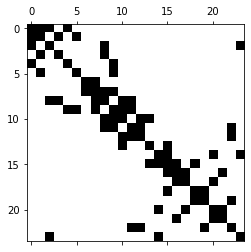

In [3]:
import matplotlib.pylab as plt
import scipy.sparse as sparse
# create a sparse matrix with specific density
# A = sparse.random(100,100, density=0.01)
# visualize the sparse matrix with Spy
plt.spy(mTEPES.Yb.imag)
# plt.spy(mTEPES.Yorden.imag)

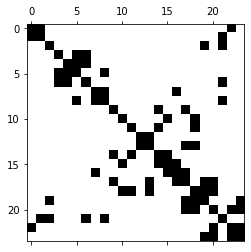

In [4]:
import matplotlib.pylab as plt
import scipy.sparse as sparse
# create a sparse matrix with specific density
# A = sparse.random(100,100, density=0.01)
# visualize the sparse matrix with Spy

plt.spy(mTEPES.Yorden.imag)

In [5]:
# print(mTEPES.Yb)

In [6]:
# # from cvxopt import spmatrix, amd
# # import chompack as cp

# # # # generate sparse matrix
# # # I = [0, 1, 3, 1, 5, 2, 6, 3, 4, 5, 4, 5, 6, 5, 6]
# # # J = [0, 0, 0, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4, 5, 6]
# # # A = spmatrix(1.0, I, J, (7,7))

# # # compute symbolic factorization using AMD ordering
# # symb = cp.symbolic(mTEPES.Yorden.imag, p=amd.order)

# import pprint
# import scipy
# import numpy as np
# import scipy.linalg   # SciPy Linear Algebra Library
# from chompack import symbolic, cspmatrix, cholesky
# A = np.abs(mTEPES.Yorden.imag)
# # A = scipy.array([[6, 3, 4, 8], [3, 6, 5, 1], [4, 5, 10, 7], [8, 1, 7, 25]])
# # L = scipy.linalg.cholesky(A, lower=True)
# U = scipy.linalg.cholesky(A, lower=False)

# # P, L, U = scipy.linalg.lu(A)

# otro   = np.zeros((len(mTEPES.nd), len(mTEPES.nd)))
# otro   = otro + np.abs(U)/np.abs(U)
# otro[np.isnan(otro)] = 0

In [7]:
# from chompack import symbolic, cspmatrix, cholesky
# cholesky(A)

In [8]:
# print(otro)

In [9]:
from cvxopt import spmatrix, amd
import chompack as cp
import numpy as np
# symb = cp.symbolic(otro, p=amd.order)
# A = spmatrix(1.0, L, U, (7,7))
# print(A)
from scipy.sparse import csr_matrix, find
otro = np.abs(mTEPES.Yb.imag)
A                      = csr_matrix(otro)
#find(Ybarra)
coo = A.tocoo()
SP = spmatrix(1.0, coo.row.tolist(), coo.col.tolist())


In [10]:
# symb = cp.symbolic(SP)
symb = cp.symbolic(SP, p=amd.order)

In [11]:
 print(symb)

[X X           ... ]
[X X           ... ]
[    X         ... ]
[      X X     ... ]
[      X X     ... ]
[          X   ... ]
[            X ... ]
[          X X ... ]
[          X X ... ]
[              ... ]
[              ... ]
[              ... ]
[              ... ]
[              ... ]
[              ... ]
[              ... ]
[              ... ]
[        X     ... ]
[        X     ... ]
[    X         ... ]
[              ... ]
[  X X         ... ]
[X X           ... ]
[              ... ]



In [12]:
print(symb.cliques())

[[0, 1, 22], [1, 21, 22], [2, 19, 21], [3, 4], [4, 17, 18], [5, 7, 8], [6, 7, 8], [7, 8, 10], [8, 10, 21], [9, 10, 16], [10, 16, 21], [11, 15, 18], [12, 14, 17], [13, 14, 18], [14, 15, 17, 18], [15, 16, 17, 18], [16, 17, 18, 21], [17, 18, 19, 20, 21], [19, 20, 21, 23], [20, 21, 22, 23]]


In [13]:
print(symb.parent())

[1, 19, 18, 4, 17, 7, 7, 8, 10, 10, 16, 15, 14, 14, 15, 16, 17, 18, 19, 19]


In [14]:
print(symb.supernodes())

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17, 18], [19], [20, 21, 22, 23]]


In [15]:
print(symb.separators())

[[1, 22], [21, 22], [19, 21], [4], [17, 18], [7, 8], [7, 8], [8, 10], [10, 21], [10, 16], [16, 21], [15, 18], [14, 17], [14, 18], [15, 17, 18], [16, 17, 18], [17, 18, 21], [19, 20, 21], [20, 21, 23], []]


In [16]:
cliques         = symb.cliques()
ncliques        = len(symb.cliques())
import numpy as np
nbuscliques     = np.zeros((ncliques, 1), dtype=int)

In [17]:
for i in range(0,ncliques):
    nbuscliques[i] = len(cliques[i])

In [18]:
# # M_reordered = symb.sparsity_pattern(reordered=False, symmetric=False)
# M_reordered = symb.spmatrix(reordered = False)
# print(M_reordered)

In [19]:
cliques

[[0, 1, 22],
 [1, 21, 22],
 [2, 19, 21],
 [3, 4],
 [4, 17, 18],
 [5, 7, 8],
 [6, 7, 8],
 [7, 8, 10],
 [8, 10, 21],
 [9, 10, 16],
 [10, 16, 21],
 [11, 15, 18],
 [12, 14, 17],
 [13, 14, 18],
 [14, 15, 17, 18],
 [15, 16, 17, 18],
 [16, 17, 18, 21],
 [17, 18, 19, 20, 21],
 [19, 20, 21, 23],
 [20, 21, 22, 23]]

In [20]:
traduccion = symb.cliques()
for i in range(0,ncliques):
    for j in range(0,int(nbuscliques[i])):
        traduccion[i][j] = 0
print(traduccion)

[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]


In [21]:
# traduccion = cliques-cliques
# import numpy as np
# traduccion = np.subtract(cliques,cliques)
for i in range(0,ncliques):
    for j in range(0,int(nbuscliques[i])):
        a = int(symb.cliques()[i][j])
        traduccion[i][j] = mTEPES.reordening[a]

In [22]:
traduccion

[[19, 18, 22],
 [18, 15, 22],
 [13, 10, 15],
 [21, 17],
 [17, 8, 9],
 [20, 23, 14],
 [16, 23, 14],
 [23, 14, 4],
 [14, 4, 15],
 [3, 4, 2],
 [4, 2, 15],
 [5, 0, 9],
 [6, 1, 8],
 [7, 1, 9],
 [1, 0, 8, 9],
 [0, 2, 8, 9],
 [2, 8, 9, 15],
 [8, 9, 10, 11, 15],
 [10, 11, 15, 12],
 [11, 15, 22, 12]]

In [27]:
ncliques2 = [i for i in range(1,ncliques) if len(traduccion[i]) == 2]
ncliques3 = [i for i in range(1,ncliques) if len(traduccion[i]) == 3]
ncliques4 = [i for i in range(1,ncliques) if len(traduccion[i]) == 4]
ncliques5 = [i for i in range(1,ncliques) if len(traduccion[i]) == 5]
ncliques6 = [i for i in range(1,ncliques) if len(traduccion[i]) == 6]
ncliques7 = [i for i in range(1,ncliques) if len(traduccion[i]) == 7]
ncliques8 = [i for i in range(1,ncliques) if len(traduccion[i]) == 8]

In [28]:
ncliques3

[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [35]:
clique_bus = [[] for i in range(0,len(mTEPES.nd))]
for k in range(1,nbus)
    for i=1:ncliques
        for j=1:nbuscliques[i]
            if k==traduccion[i][j]
            a = convert(Int, traduccion[i][j])
            push!(clique_bus[a],i)
#             @constraint(m,eval(Xbs[k]).==eval(Xcliques[i])[j+j-1:j+j,j+j-1:j+j])


In [36]:
len(clique_bus)

24